## When is College Worth it: An In-depth Data Analysis of Post University Wages. 

Group members: \
Zhenzhao Tu (UID u1315097)\
Fernando Turcios (UID U0935172) \
Lincoln Sand (UID u1358804)


Emails: tuzhenzhao@gmail.com, Fernandoturcios222@gmail.com and sandlincoln@gmail.com

## Project description


The main objective of the project is to determine the most optimal way to go to college. The data provided is from 1.2 million people with only a bachelor's degree. There are three major sections to the website, Salary Increase by Major, Salaries By Region, and Salary Increase By Type of College. We want to look at these three variables (Major, Region, and College Type) and see if they play a major role in predicting a students post university wage. The data provided breaks down the distirubiton of salaries for various majors, schools, and regions into various variables. The next step is to do some exploratory analysis to understand our data and determine our essential variables. For the exploratory analysis methods, we plan on using some basic descriptive statistics for each variable on its own (mean, median, stdev...) and also plotting (to determine the overall distribution of the sampled variable). Next, we can test the relationship between variables (multiple variables also) with linear regression and scatter plots. We will need to figure out a way to determine how to handle the categorical variables (group undecided on how to proceed). After that, we wish to apply some more intensive analysis methods learned in class (which will be determined after the exploratory analysis).

## Data Description

The data we will be using is provided by The Wall Street Journal on their website: http://online.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html.
The data is from a year-long survey of 1.2 million people with only bachelor's degrees. The survey breaks the data down into 3 major sections. The first section is Salaries for colleges by type. This section consists of a 269 rows (different schools) and 7 variables (1 school type and 6 salary variables). The next section Salaries for colleges by region is similar to the previous section with 320 rows and 7 variables (1 region variable and 6 salary variables). The third section is Degrees that pay you back, it contains 50 rows for different majors and 7 variables (6 about salary and 1 about growth). These three sections are the csv files attached. They were required to be scraped from the website by downloading the html site and we were able to scrape it from the saved data. The Wall street journal had not little to no info on their rules for scraping. The scrapping was tedious with the first page, but once it was all sorted out, the overall code was able to be copied and pasted for the other two sections with minor changes. The code overall is pretty much clean but there are a few missing values for each of the columns on some of the sections (primarily 2 of the sections the 3rd section has no missing values). For these missing values (quite a few for one of the variables) we wish to apply a bootstrapping method to fill in the missing values instead of leaving them out or replacing those values with 0.



## Ethical Data Concerns (EDA) 

There are a few things to consider about the data we are using. The biggest concern is that there is little detail on how the data was collected. We are relying on the reputation of The New York Times. We dont know if the data was collected using appropriate methods (Simple Random Sample, the wording of survey....). Without any details on how the survey was conducted we can not be sure that our data came from a proccess of good scientific standadrd. Another concern is how we handle our categorical data. For example the section that contains the college type can contain 1 of 5 diffrent opetions (Califonia, Western, Midestern, Southern, Northeastern). To try and analize this we might convert those options into a number system to do proper anaylsis. When finalizing our results, we must be aware that they rely on the strength of the survey conducted and the reputation of The New York Times and trust that the overall process was done with high scientific standards. 

## Package Import

In [54]:
# imports and setup 

import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import math
import statistics as st

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

## Data Exploration

First we import the datasets that were scraped for the team to use:

Datasets: 

1) Majors 

2) Universities sorted by school region 

3) Universties sorted by school type 

In [55]:
#Importing scraped dataset sorted by Major
major = pd.read_csv("Project_Major_dataset.csv")
major.rename(columns = {'Unnamed: 0':'Major'}, inplace = True)
major.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [56]:
#Importing scraped dataset sorted by school and by region 
df_region = pd.read_csv("Project_school_dataset.csv")
df_region.rename(columns = {'Unnamed: 0':'University'}, inplace = True)
df_region.head()

,University,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


In [57]:
#Importing scraped dataset sorted by school and by schoool type 
df_type = pd.read_csv("Project_school_type_dataset.csv")
df_type.rename(columns = {'Unnamed: 0':'University'}, inplace = True)
df_type.head()


,University,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


# Exploratory Analysis: By Major 
This next section we will be exploring the dataset that is sorted by University Major (we will focus on the other two datasets separately later in the report) 




In [58]:
#Descriptive Statistics 
#Adjusting the Major dataframe name (Code was written seperatly)
df_Major = major
print(df_Major.describe())
print(df_Major.info())


       Starting Median Salary  Mid-Career Median Salary  \
count               50.000000                  50.00000   
mean             44310.000000               74786.00000   
std               9360.866217               16088.40386   
min              34000.000000               52000.00000   
25%              37050.000000               60825.00000   
50%              40850.000000               72000.00000   
75%              49875.000000               88750.00000   
max              74300.000000              107000.00000   

       Percent change from Starting to Mid-Career Salary  \
count                                          50.000000   
mean                                           69.274000   
std                                            17.909908   
min                                            23.400000   
25%                                            59.125000   
50%                                            67.800000   
75%                                            8

We see that the dataset sorted by Major is made up of 7 different salary columns (five columns for Mid-Career Salary, one starting salary, and one about the percent change from starting salary to mid-career).

There are 50 different Majors in this data (no missing data values).

From the descriptive statistics info provided, we see the standard deviation for starting salary is not as spread (when compared to the mid-career median salary). When we look at the 10% percentile mid-career median salary we see that the mean is less than the starting median salary. As we begin to go up in percentile in the mid-career salary data and we see that the mean rises and so does the spread. 

To better understand, we will look at the overall distribution graphically next. With box plot and seaborn plots. 

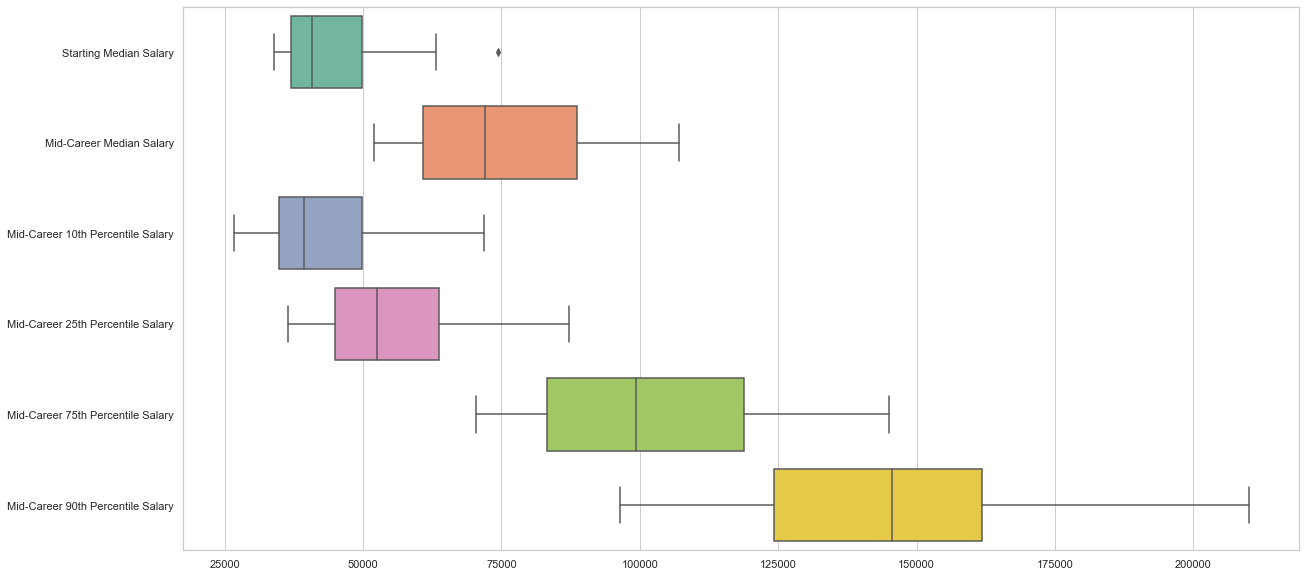

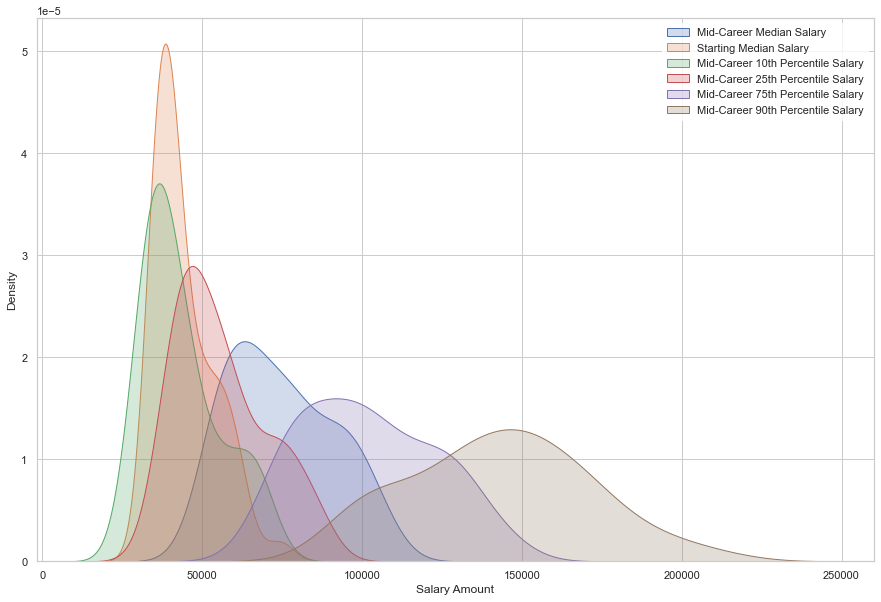

In [82]:
#Box plot to understand the distribution of the variables
ax = sns.boxplot(data=df_Major[["Starting Median Salary","Mid-Career Median Salary","Mid-Career 10th Percentile Salary","Mid-Career 25th Percentile Salary","Mid-Career 75th Percentile Salary","Mid-Career 90th Percentile Salary"]], orient="h", palette="Set2")

#plotting the disribution of the data
f, ax1 = plt.subplots(figsize=(15, 10))
#ditribution plots 
sns.kdeplot(df_Major["Mid-Career Median Salary"], shade=True,label="Mid-Career Median Salary")
sns.kdeplot(df_Major["Starting Median Salary"], shade=True,label="Starting Median Salary")
sns.kdeplot(df_Major["Mid-Career 10th Percentile Salary"], shade=True,label="Mid-Career 10th Percentile Salary")
sns.kdeplot(df_Major["Mid-Career 25th Percentile Salary"], shade=True,label="Mid-Career 25th Percentile Salary")
sns.kdeplot(df_Major["Mid-Career 75th Percentile Salary"], shade=True,label="Mid-Career 75th Percentile Salary")
sns.kdeplot(df_Major["Mid-Career 90th Percentile Salary"], shade=True,label="Mid-Career 90th Percentile Salary")

legend = plt.legend()
frame = legend.get_frame()
frame.set_color('white')
plt.xlabel("Salary Amount");



From both the plots, we see an apparent change in the concentration of starting median salaries and the mid-career median salaries. We see only one "extreme" value in the starting median salary. As expected, we see the ten percentile of mid-career salaries for the 50 majors be distributed slightly less than the rest of the mid-career salary columns. It was a bit surprising to see that the overall ten percentile for mid-career salaries distribution was "shifted" a bit below the starting median salaries. As expected, the mid-career salaries distribution shifts up as we move up in percentile. 

Next, we primarily focus on the starting median salaries for each major and compare them to the mid-career median salary for each major. 



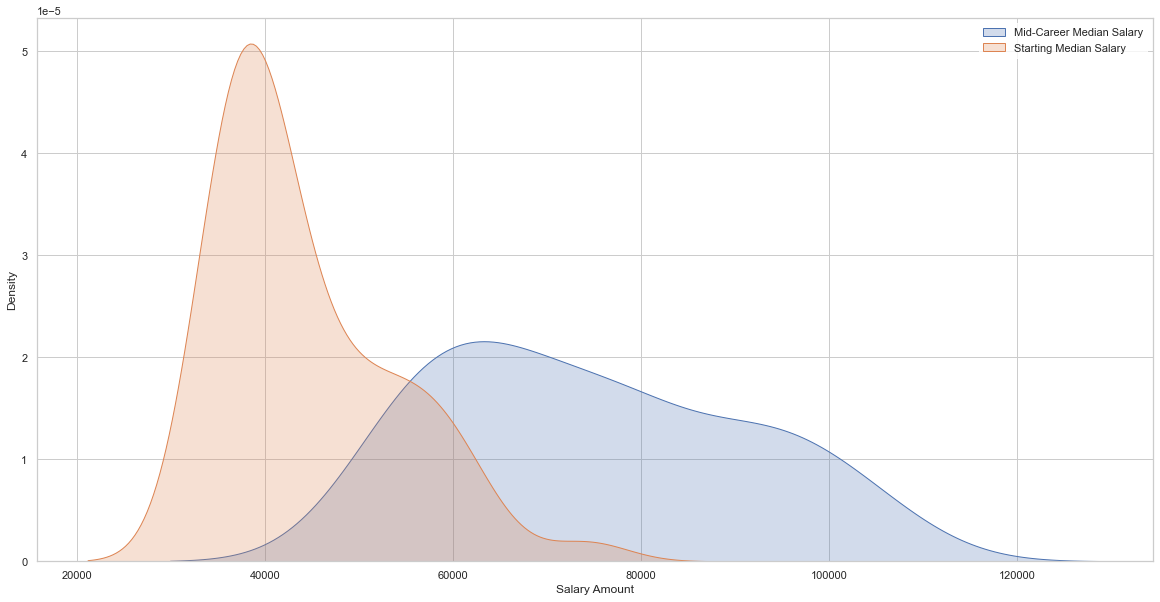

In [81]:
#Graphically looking at starting median salary vs mid-career median salary. 
sns.kdeplot(df_Major["Mid-Career Median Salary"], shade=True,label="Mid-Career Median Salary")
sns.kdeplot(df_Major["Starting Median Salary"], shade=True,label="Starting Median Salary")

legend = plt.legend()
frame = legend.get_frame()
frame.set_color('white')
plt.xlabel("Salary Amount");

The distribution of starting salaries is centered "closely" around the mean, but the mid-career median salaries for majors are much more spread (not centered around the mean). It appears almost as if the higher starting salaried majors had a higher median salary, and majors that had higher starting salaries seem to enjoy a higher rate of growth also. We cannot conclude this just from the plot; further analysis will need to be done (later in the report). 

Next, we will compare the differences between starting and mid-career salaries (side by side). 


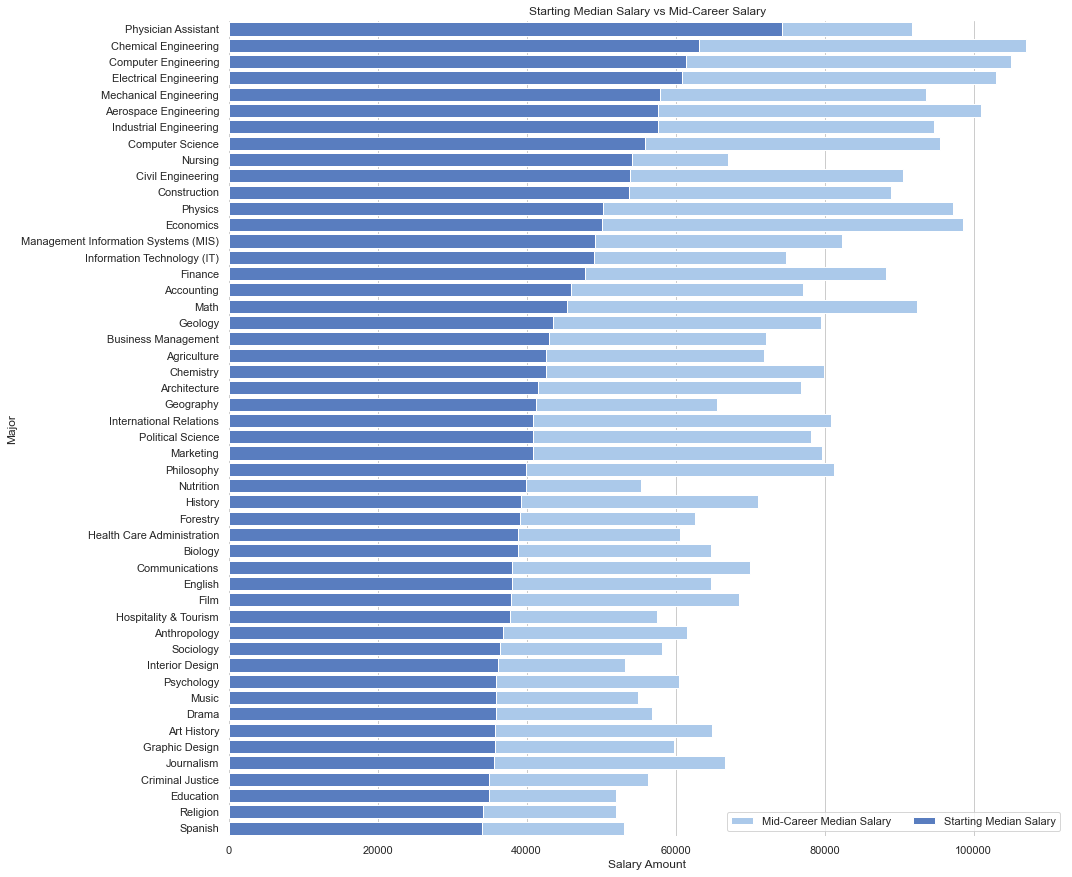

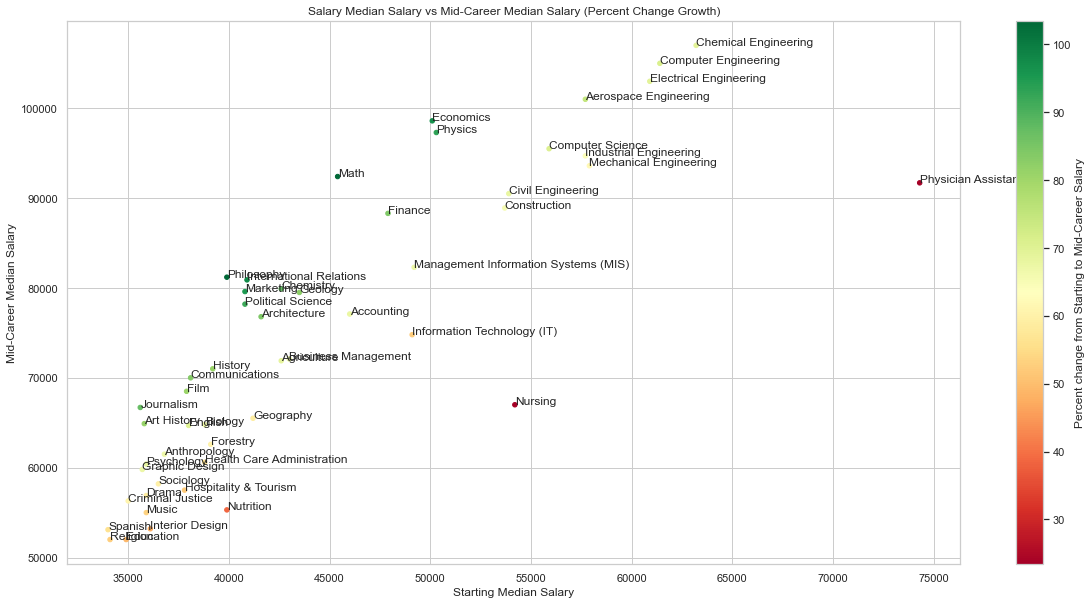

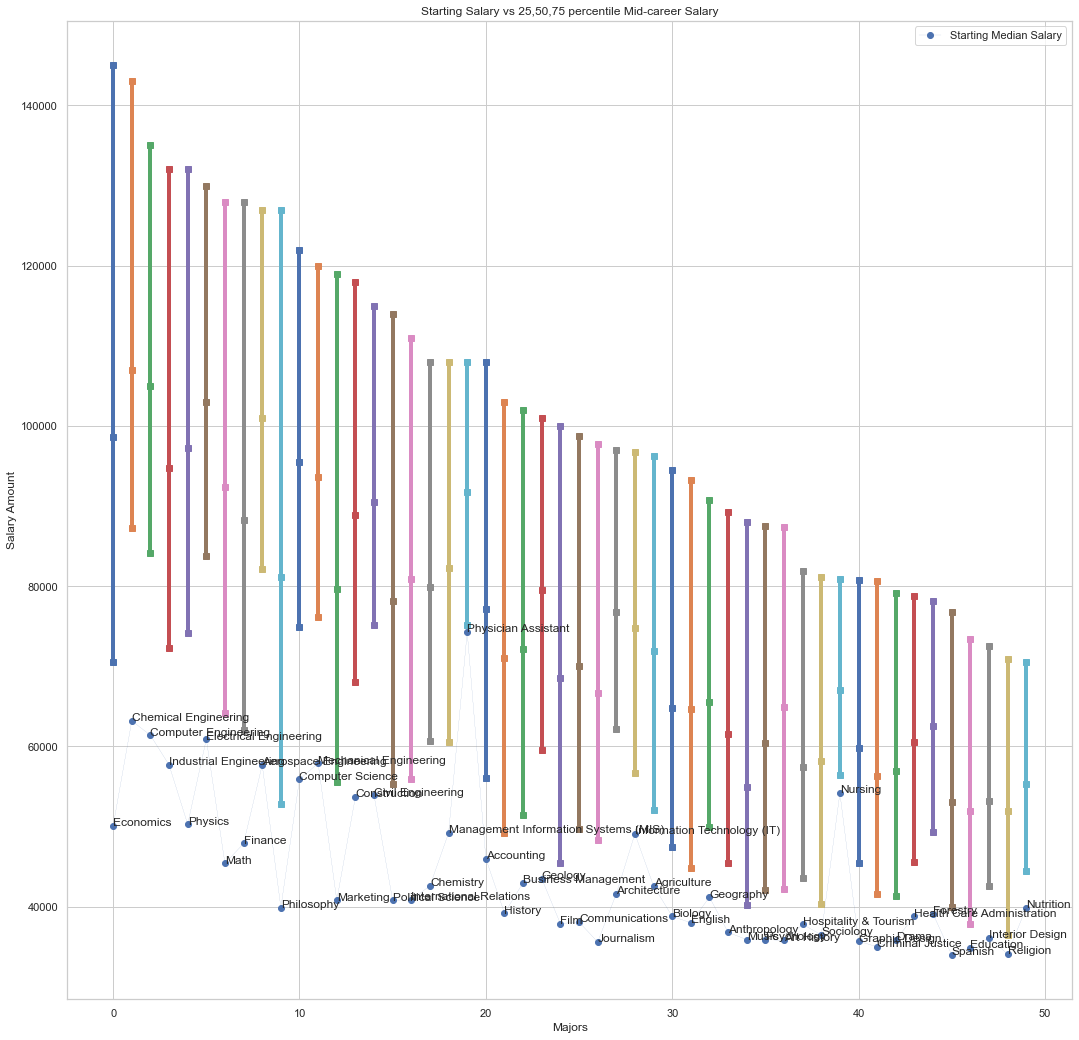

In [103]:
#Visually see the difference

#Plotting both starting salaries and mid career to see the diffrences by major. 

sns.set_theme(style="whitegrid")

#sorting values by starting median salary
df_sortStarting = df_Major.sort_values(by='Starting Median Salary', ascending=False)

# Initialize the matplotlib figure
f, ax2 = plt.subplots(figsize=(15, 15))

sns.set_color_codes("pastel")
#plotting Major vs Mid-career median salary
sns.barplot(y=df_sortStarting["Major"], x="Mid-Career Median Salary", data=df_sortStarting,label="Mid-Career Median Salary", color="b");
#plotting Major vs starting median salatry
sns.set_color_codes("muted")
sns.barplot(y=df_sortStarting["Major"], x="Starting Median Salary", data=df_sortStarting,label="Starting Median Salary", color="b");

# Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)
plt.xlabel("Salary Amount");
plt.title("Starting Median Salary vs Mid-Career Salary")




f, ax1 = plt.subplots(figsize=(20, 10))

df_sort75Percentile.plot.scatter(x='Starting Median Salary',y='Mid-Career Median Salary', c='Percent change from Starting to Mid-Career Salary', cmap="RdYlGn",ax=ax1)
for i, val in enumerate(df_sort75Percentile["Major"]):
    plt.annotate(val,xy=(df_sort75Percentile['Starting Median Salary'][i],df_sort75Percentile['Mid-Career Median Salary'][i])) 
plt.title("Salary Median Salary vs Mid-Career Median Salary (Percent Change Growth)");



#plotting starting salary vs median 25,50,75 mid career percentiles 

#Changing the name dataframe to work with code
df_Major = major

#creating an array from 0 to 50 
#adding array to dataframe for plotting 
x = range(0,50)
df_sort75Percentile = df_Major.sort_values(by='Mid-Career 75th Percentile Salary', ascending=False)
df_sort75Percentile["id2"] = x
df_sort75Percentile=df_sort75Percentile.set_index('id2')
df_sort75Percentile["id"] = x

f, ax1 = plt.subplots(figsize=(18, 18))

for i, val in enumerate(df_sort75Percentile["Major"]):
    x = np.full((1,3),df_sort75Percentile['id'][i])
    y = np.full((1,3),0)
    
    y[0][0] = df_sort75Percentile["Mid-Career 25th Percentile Salary"][i]
    y[0][1] = df_sort75Percentile["Mid-Career Median Salary"][i]
    y[0][2] = df_sort75Percentile["Mid-Career 75th Percentile Salary"][i]
    
    plt.plot(x[0],y[0],marker='s',linewidth=4)
    
    
plt.plot(df_sort75Percentile['id'],df_sort75Percentile['Starting Median Salary'],marker='o',label='Starting Median Salary',linewidth=.1)    
ax1.legend()    
   
for i, val in enumerate(df_sort75Percentile["Major"]):
    plt.annotate(val,xy=(df_sort75Percentile['id'][i],df_sort75Percentile['Starting Median Salary'][i])) 
    
plt.title("Starting Salary vs 25,50,75 percentile Mid-career Salary");

plt.ylabel("Salary Amount");
plt.xlabel("Majors");


#difference 
diff = df_sort75Percentile["Mid-Career Median Salary"]-df_sort75Percentile["Starting Median Salary"]
Mid_Career_75_25_Range = df_sort75Percentile["Mid-Career 75th Percentile Salary"]-df_sort75Percentile["Mid-Career 25th Percentile Salary"]
df_sort75Percentile["Difference Between Mid-Career and Starting Salary"] = diff   
df_sort75Percentile["Mid_Career_75_25_Range"] = Mid_Career_75_25_Range 


    
    

Graph 1: Starting Median Salary vs Mid-Career Median Salary 
For this graph we 



From the three graphs above, Physician Assistant clearly shows that it has the highest earning starting salary, but it has one of the lowest salary growths for mid-careers. One notable degree was Mathematics, which had a starting salary below the average starting median salary and ended up having one of the best salary growths from starting to mid-career median salary. 

There are a few degrees that had "low" starting salary ended up having the best growth ratios to mid-career, and some "high" starting salary degrees ended up with some of the lowest growth rates to mid-career. Those are just a few examples from an "eye-test," but is there a relationship between starting salaries and growth rates to mid-career salaries? 

In the next section, we will try to answer two questions in detail:
1) Does your starting salary have a relationship with the salary growth rate? 

2) What is the best Major to take (We define best majors as a combination of high starting salary and high growth).

## Analysis Methodology: University Majors



In [104]:
# adding a difference between Starting Median Salary and Mid-Career Median Salary
difference =  major['Mid-Career Median Salary']-major['Starting Median Salary']
major["difference"] = difference
major.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,difference
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0,31100.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0,43300.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0,29300.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0,24700.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0,35200.0


In [105]:
# sorting mid-career median salary
mid_sala = major.sort_values(by='Mid-Career Median Salary', ascending=False)
mid_sala.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,difference
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0,43800.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0,43600.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0,42100.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0,43300.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0,48500.0


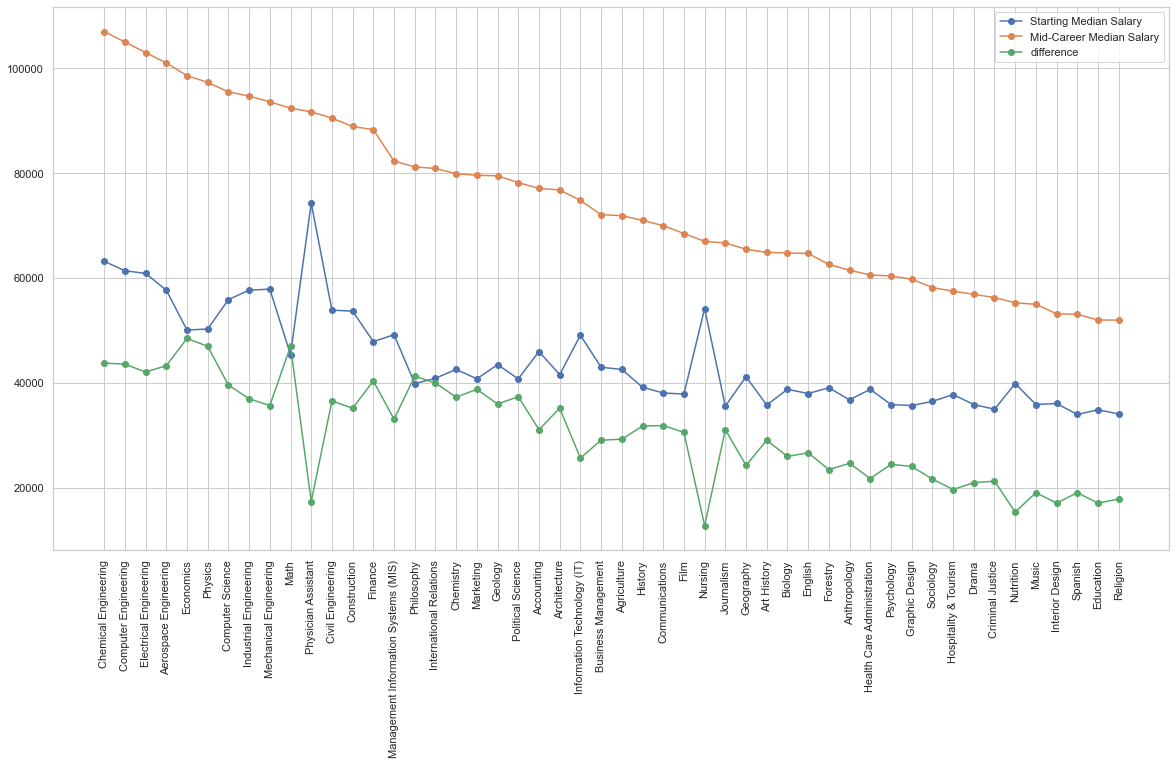

In [160]:
plt.plot(mid_sala["Major"], mid_sala['Starting Median Salary'], label = 'Starting Median Salary',marker='o')
plt.plot(mid_sala["Major"], mid_sala['Mid-Career Median Salary'], label = 'Mid-Career Median Salary',marker='o')
plt.plot(mid_sala["Major"], mid_sala['difference'], label = 'difference',marker='o')
plt.legend()
plt.xticks(rotation = 90);

In [107]:
# create a sorted difference
# adding a rank list

diff = major[['Major', 'Mid-Career Median Salary', 'difference']]
diff = diff.sort_values(by='Mid-Career Median Salary', ascending=False)
diff['rank'] = [51-x for x in range(1,51)]
diff = diff.sort_values(by='difference', ascending=False)
diff = diff.set_index('Major')
diff.head()

,Mid-Career Median Salary,difference,rank
Major,,,
Economics,98600.0,48500.0,46
Math,92400.0,47000.0,41
Physics,97300.0,47000.0,45
Chemical Engineering,107000.0,43800.0,50
Computer Engineering,105000.0,43600.0,49


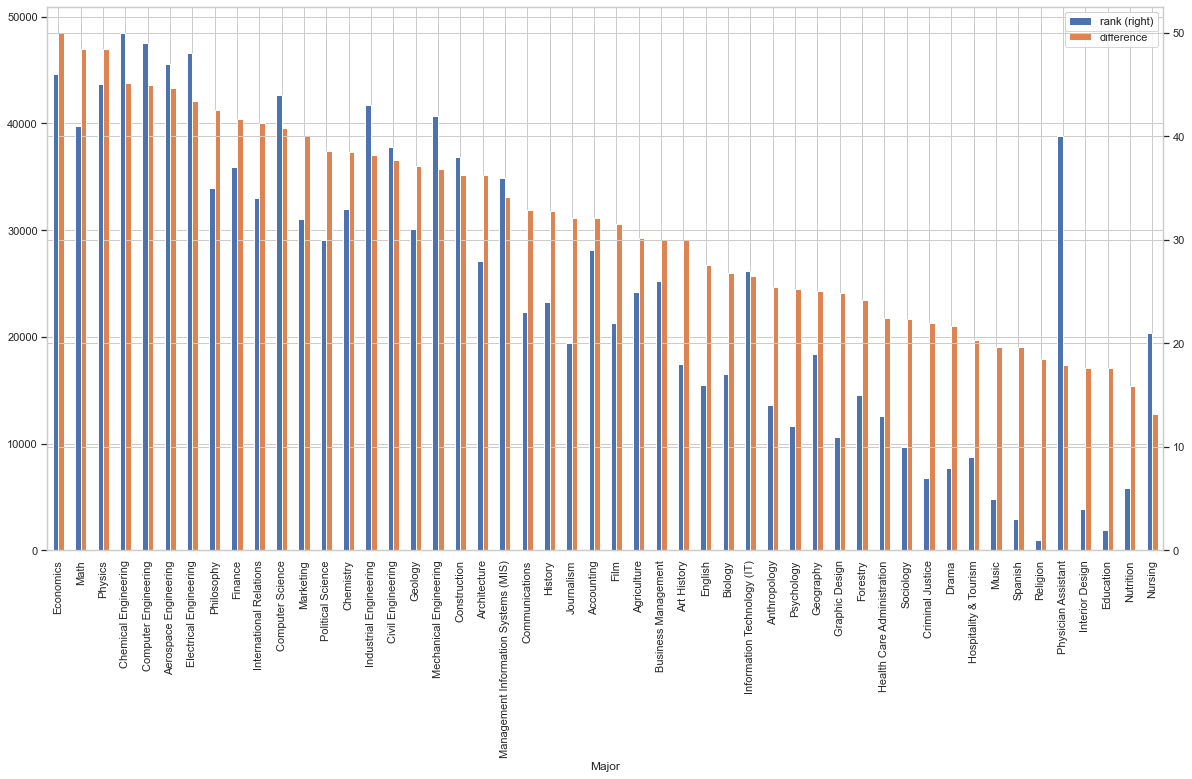

In [108]:
diff[['rank', 'difference']].plot(kind='bar', secondary_y = ["rank"], grid=True, label = 'rank')

# diff['difference'].plot(grid=True, label = 'difference')
# plt.plot(diff["Major"], diff['Mid-Career Median Salary'], label = 'Mid-Career Median Salary')
# plt.plot(diff["Major"], diff['difference'], label = 'difference')
plt.legend()

In [109]:
class_start = major[['Major', 'Starting Median Salary']]
sort = class_start.sort_values(by='Starting Median Salary', ascending=False)
sort['rank'] = [51-x for x in range(1,51)]
sort.head()

list_group = np.array_split(sort, 5)
list_group[1]

,Major,Starting Median Salary,rank
14,Construction,53700.0,40
44,Physics,50300.0,39
17,Economics,50100.0,38
35,Management Information Systems (MIS),49200.0,37
31,Information Technology (IT),49100.0,36
22,Finance,47900.0,35
0,Accounting,46000.0,34
37,Math,45400.0,33
25,Geology,43500.0,32
7,Business Management,43000.0,31


In [110]:
difference = major[['Major', 'difference']]
sort_diff = difference.sort_values(by='difference', ascending=False)
sort_diff['rank'] = [51-x for x in range(1,51)]
list_diff = np.array_split(sort_diff, 5)
list_diff[0]

,Major,difference,rank
17,Economics,48500.0,50
44,Physics,47000.0,49
37,Math,47000.0,48
8,Chemical Engineering,43800.0,47
12,Computer Engineering,43600.0,46
1,Aerospace Engineering,43300.0,45
19,Electrical Engineering,42100.0,44
42,Philosophy,41300.0,43
22,Finance,40400.0,42
33,International Relations,40000.0,41


In [112]:
selected = []

for i in range(5):
    int_df = pd.merge(list_group[i], list_diff[i], how ='inner', on =['Major'])
    selected.append(int_df)
    
selected

[                    Major  Starting Median Salary  rank_x  difference  rank_y
 0    Chemical Engineering                 63200.0      49     43800.0      47
 1    Computer Engineering                 61400.0      48     43600.0      46
 2  Electrical Engineering                 60900.0      47     42100.0      44
 3   Aerospace Engineering                 57700.0      45     43300.0      45,
           Major  Starting Median Salary  rank_x  difference  rank_y
 0  Construction                 53700.0      40     35200.0      32
 1       Geology                 43500.0      32     36000.0      34,
          Major  Starting Median Salary  rank_x  difference  rank_y
 0  Agriculture                 42600.0      30     29300.0      24
 1      History                 39200.0      21     31800.0      28,
                         Major  Starting Median Salary  rank_x  difference  \
 0                    Forestry                 39100.0      20     23500.0   
 1  Health Care Administration     

In [113]:
alpha_diff = sort_diff.sort_values(by=['Major'], ascending=True)
alpha_diff.head()

,Major,difference,rank
0,Accounting,31100.0,26
1,Aerospace Engineering,43300.0,45
2,Agriculture,29300.0,24
3,Anthropology,24700.0,18
4,Architecture,35200.0,31


In [114]:
alpha_start = sort.sort_values(by=['Major'], ascending=True)
alpha_start.head()

,Major,Starting Median Salary,rank
0,Accounting,46000.0,34
1,Aerospace Engineering,57700.0,45
2,Agriculture,42600.0,30
3,Anthropology,36800.0,13
4,Architecture,41600.0,28


In [115]:
sum_rank = alpha_start['rank'] + alpha_diff['rank']
class_start['sum_rank'] = sum_rank
df_sum_rank = class_start.sort_values(by=['sum_rank'], ascending=False)

df_sum_rank.head()

/var/folders/nh/76fml8p10k1dpcjsk8m_klbr0000gn/T/ipykernel_1195/3908499153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_start['sum_rank'] = sum_rank


,Major,Starting Median Salary,sum_rank
8,Chemical Engineering,63200.0,96
12,Computer Engineering,61400.0,94
19,Electrical Engineering,60900.0,91
1,Aerospace Engineering,57700.0,90
44,Physics,50300.0,88


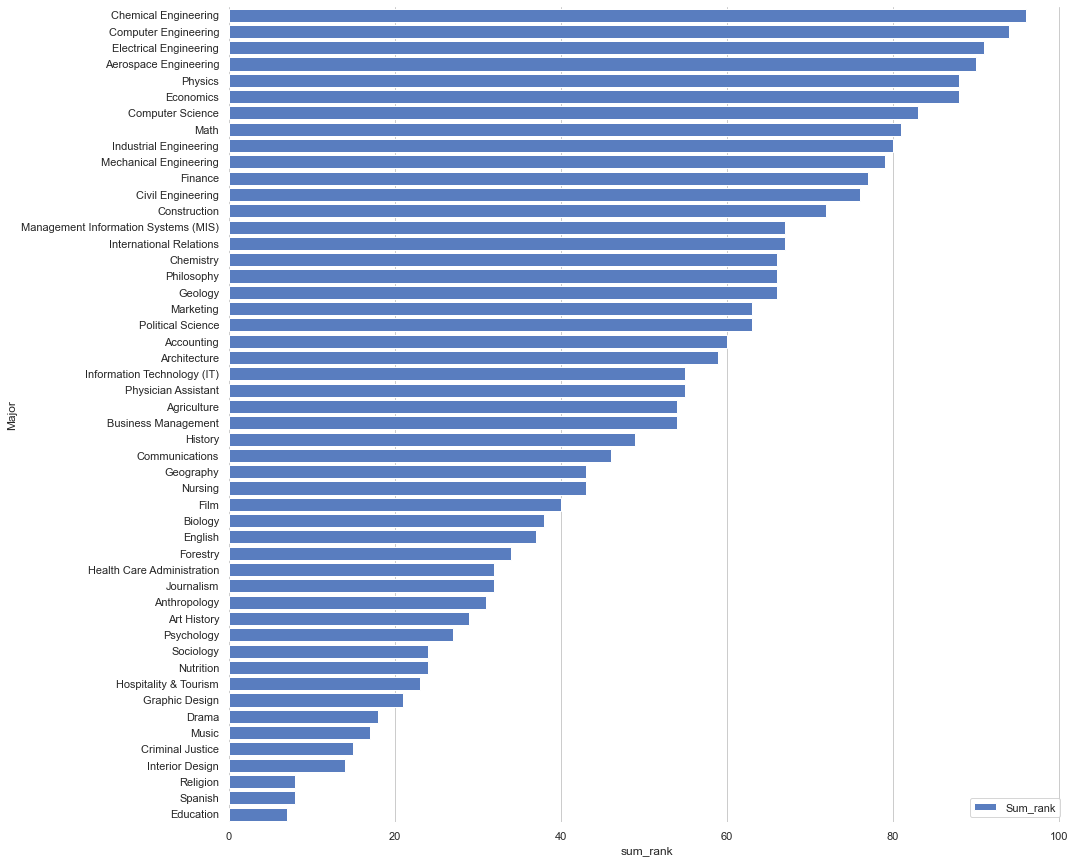

In [116]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax2 = plt.subplots(figsize=(15, 15))

sns.set_color_codes("muted")
sns.barplot(y=df_sum_rank["Major"], x="sum_rank", data=df_sum_rank,label="Sum_rank", color="b")

# Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

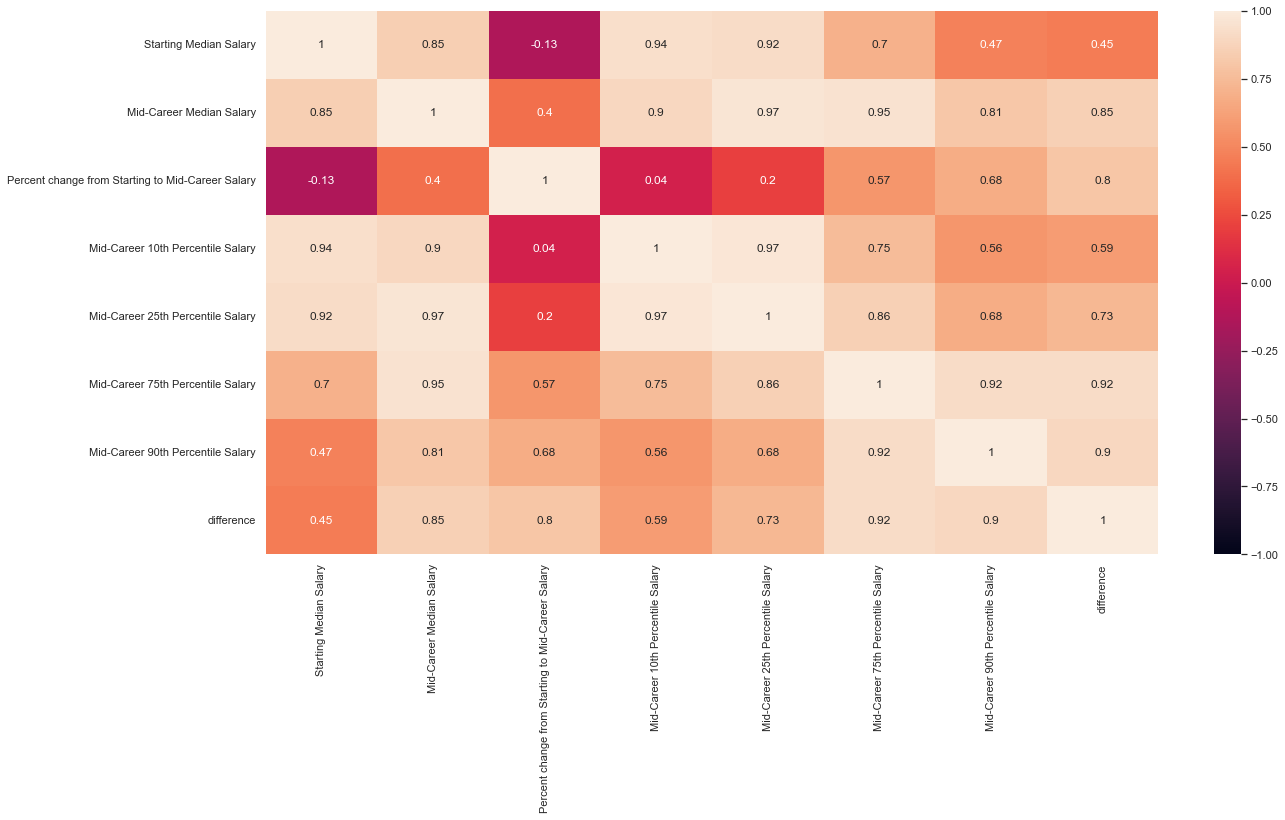

In [17]:
#heat map

# major = major.set_index('Major')
# major = major.drop(columns=['id'])
corr_major = major.corr()
heatmap = sns.heatmap(corr_major, vmin=-1, vmax=1, annot=True)

In [152]:
# linear regression
lr_major = mid_sala[['Major','difference', 'Mid-Career Median Salary', 'Starting Median Salary',"Percent change from Starting to Mid-Career Salary"]]
lr_major.head()


,Major,difference,Mid-Career Median Salary,Starting Median Salary,Percent change from Starting to Mid-Career Salary
8,Chemical Engineering,43800.0,107000.0,63200.0,69.3
12,Computer Engineering,43600.0,105000.0,61400.0,71.0
19,Electrical Engineering,42100.0,103000.0,60900.0,69.1
1,Aerospace Engineering,43300.0,101000.0,57700.0,75.0
17,Economics,48500.0,98600.0,50100.0,96.8


In [153]:
lr_start = lr_major.sort_values(by=['Starting Median Salary'], ascending=True)
lr_start.head()

,Major,difference,Mid-Career Median Salary,Starting Median Salary,Percent change from Starting to Mid-Career Salary
49,Spanish,19100.0,53100.0,34000.0,56.2
47,Religion,17900.0,52000.0,34100.0,52.5
18,Education,17100.0,52000.0,34900.0,49.0
15,Criminal Justice,21300.0,56300.0,35000.0,60.9
34,Journalism,31100.0,66700.0,35600.0,87.4


In [154]:
lr_start = lr_start.rename(columns={"Mid-Career Median Salary": "Mid_Career", "Starting Median Salary": "Starting","Percent change from Starting to Mid-Career Salary": "Percent_change"}, errors="raise")
lr_start.head()


,Major,difference,Mid_Career,Starting,Percent_change
49,Spanish,19100.0,53100.0,34000.0,56.2
47,Religion,17900.0,52000.0,34100.0,52.5
18,Education,17100.0,52000.0,34900.0,49.0
15,Criminal Justice,21300.0,56300.0,35000.0,60.9
34,Journalism,31100.0,66700.0,35600.0,87.4


                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     12.18
Date:                Sat, 23 Apr 2022   Prob (F-statistic):            0.00105
Time:                        21:54:10   Log-Likelihood:                -522.92
No. Observations:                  50   AIC:                             1050.
Df Residuals:                      48   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.017e+04   5943.616      1.711      0.0

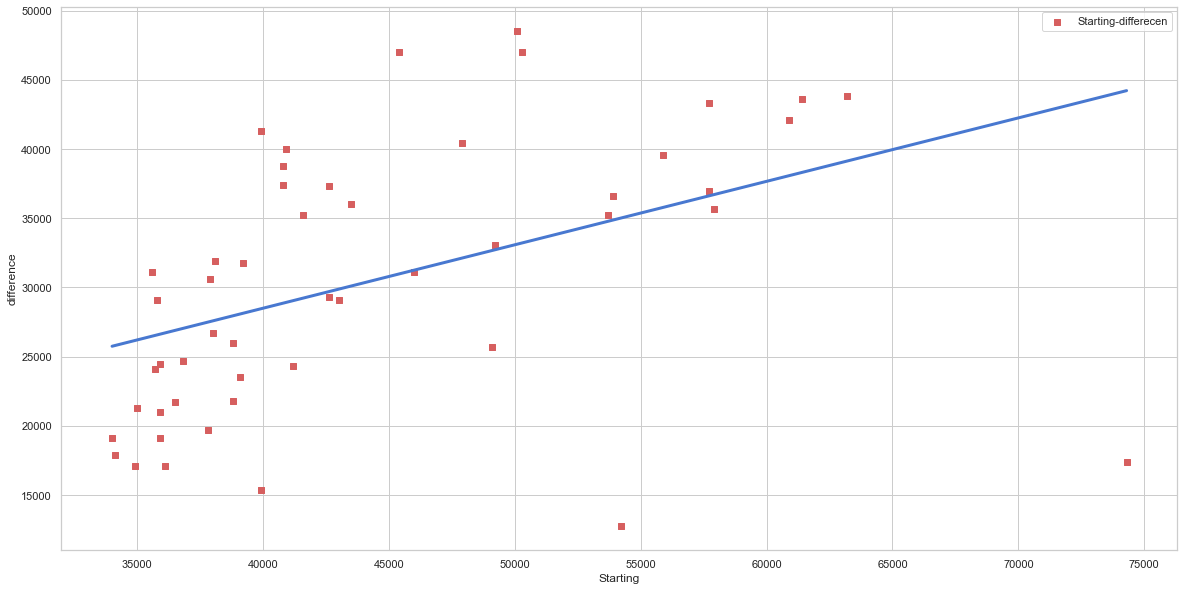

In [155]:
diff_start_ols = sm.ols(formula="difference ~ Starting", data=lr_start).fit()
print(diff_start_ols.summary())

plt.scatter(x=lr_start['Starting'],y=lr_start['difference'],c='r',marker='s',label='Starting-differecen')
plt.plot(lr_start['Starting'],diff_start_ols.predict(),c='b',linewidth=3)
plt.xlabel('Starting') 
plt.ylabel('difference')
plt.legend()

                            OLS Regression Results                            
Dep. Variable:             Mid_Career   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     123.4
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           7.30e-15
Time:                        21:55:27   Log-Likelihood:                -522.92
No. Observations:                  50   AIC:                             1050.
Df Residuals:                      48   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.017e+04   5943.616      1.711      0.0

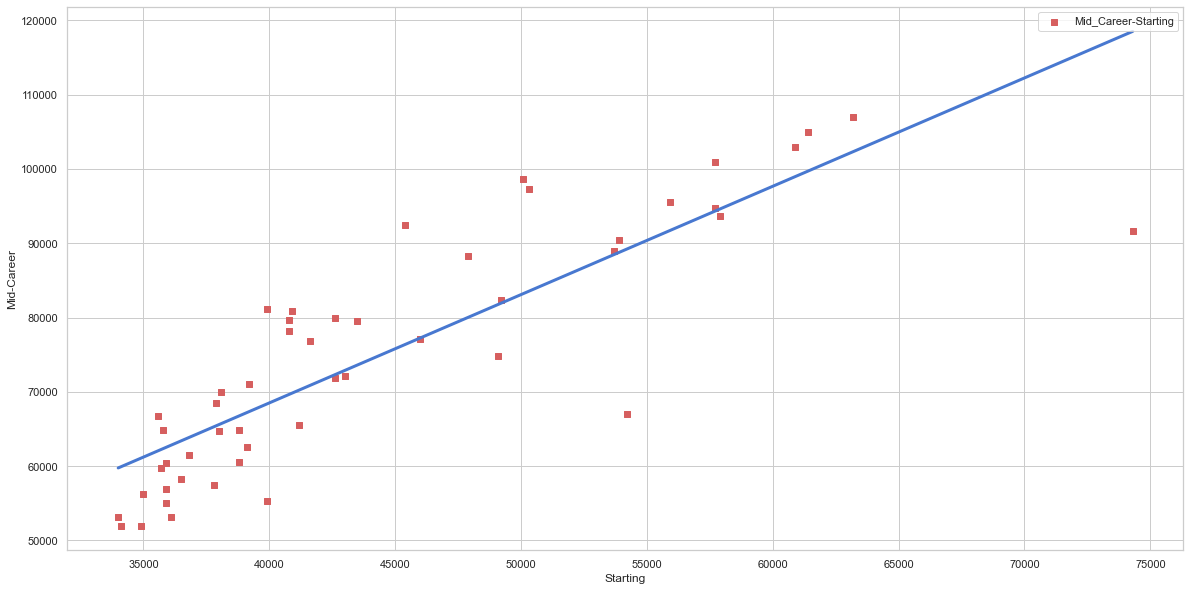

In [157]:
diff_start_ols = sm.ols(formula="Mid_Career ~ Starting", data=lr_start).fit()
print(diff_start_ols.summary())

plt.scatter(x=lr_start['Starting'],y=lr_start['Mid_Career'],c='r',marker='s',label='Mid_Career-Starting')
plt.plot(lr_start['Starting'],diff_start_ols.predict(),c='b',linewidth=3)
plt.xlabel('Starting') 
plt.ylabel('Mid-Career')
plt.legend()

Our simple linear regression model found that for every dollar earned in a starting salary, the median mid-career salary increases about .72 cents per dollar. We suspected that there was a strong correlation between of starting median salary and the mid-career median salary (which makes sense intuitively since the higher starting salary makes a higher salary "appear high" since it has a higher starting base salary. The thing we really want to test is if starting salary has any indication on the rate of mid-career salary growth. 

Next, we will test do simple linear regression with starting median salary and percent change to mid-career median salary. 

                            OLS Regression Results                            
Dep. Variable:         Percent_change   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8852
Date:                Sun, 24 Apr 2022   Prob (F-statistic):              0.351
Time:                        15:15:28   Log-Likelihood:                -214.25
No. Observations:                  50   AIC:                             432.5
Df Residuals:                      48   BIC:                             436.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.6819     12.388      6.513      0.0

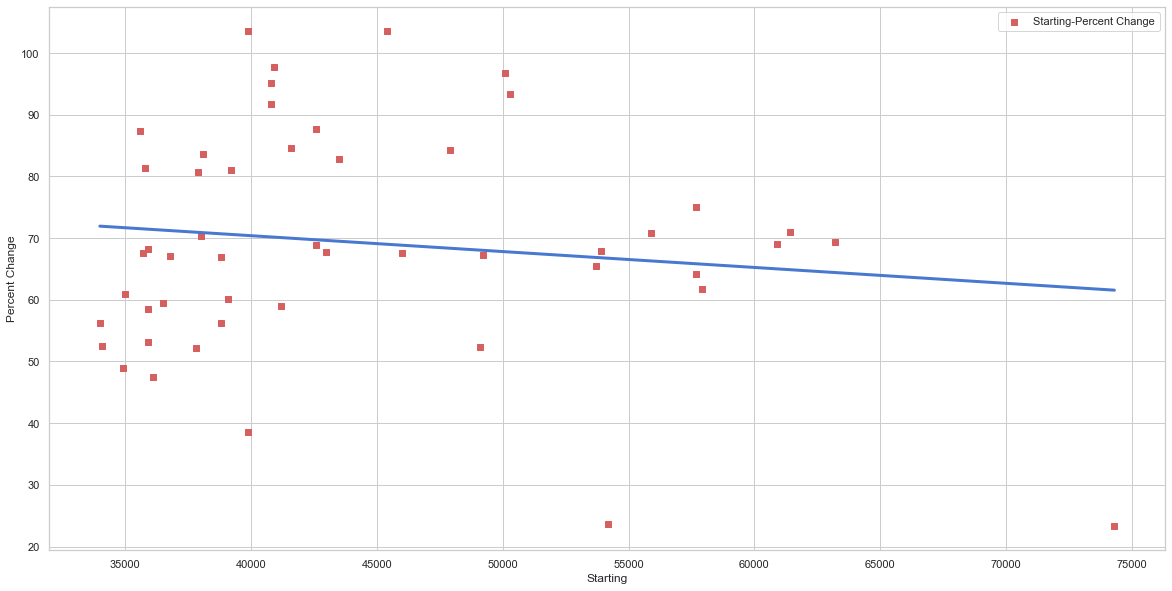

In [166]:
diff_start_ols = sm.ols(formula="Percent_change ~ Starting", data=lr_start).fit()
print(diff_start_ols.summary())

plt.scatter(x=lr_start['Starting'],y=lr_start['Percent_change'],c='r',marker='s',label='Starting-Percent Change')
plt.plot(lr_start['Starting'],diff_start_ols.predict(),c='b',linewidth=3)
plt.xlabel('Starting') 
plt.ylabel('Percent Change')
plt.legend()

Since the R^2 value is .018 and by the slope of the regression line in the plot above, we see that the correlation is -.134; since it's near-zero, this tells us that there is no strong linear relationship between those two variables. This tells us that just because a major has a high starting salary, that may not indicate you will have a high percent salary growth (which in the long run might be better). 

## Conclusion 





# Universties by region and type 

for the next section we will be doing ......

In [162]:
major = pd.read_csv("Project_Major_dataset.csv")
major.rename(columns = {'Unnamed: 0':'Major'}, inplace = True)

df_region = pd.read_csv("Project_school_dataset.csv")
df_region.rename(columns = {'Unnamed: 0':'University'}, inplace = True)

df_type = pd.read_csv("Project_school_type_dataset.csv")
df_type.rename(columns = {'Unnamed: 0':'University'}, inplace = True)

# rename all columns
df_region.rename(columns = {'Starting Median Salary':'Starting_region', 'Mid-Career Median Salary':'Mid_region',\
                            'Mid-Career 25th Percentile Salary': 'Mid_25th_region', \
                           'Mid-Career 75th Percentile Salary': 'Mid_75th_region',\
                           'Mid-Career 90th Percentile Salary': 'Mid_90th_region',\
                           'Mid-Career 10th Percentile Salary': 'Mid_10th_region'}, inplace = True)
df_region.head()


df_type.rename(columns = {'Starting Median Salary':'Starting_type', 'Mid-Career Median Salary':'Mid_type',\
                          'Mid-Career 25th Percentile Salary': 'Mid_25th_type', \
                           'Mid-Career 75th Percentile Salary': 'Mid_75th_type',\
                           'Mid-Career 90th Percentile Salary': 'Mid_90th_type',\
                           'Mid-Career 10th Percentile Salary': 'Mid_10th_type'}, inplace = True)

# merged dataset
df_type_region = pd.merge(df_region, df_type, how ='inner', on =['University'])
df_type_region = df_type_region[['University', 'Region', 'School Type', 'Starting_region', 'Mid_region', 'Mid_10th_region', 'Mid_25th_region','Mid_75th_region','Mid_90th_region',]]
df_type_region.head()




,University,Region,School Type,Starting_region,Mid_region,Mid_10th_region,Mid_25th_region,Mid_75th_region,Mid_90th_region
0,California Institute of Technology (CIT),California,Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
1,Harvey Mudd College,California,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
2,"University of California, Berkeley",California,State,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
3,Occidental College,California,Liberal Arts,51900.0,105000.0,NaN,54800.0,157000.0,NaN
4,Cal Poly San Luis Obispo,California,State,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0


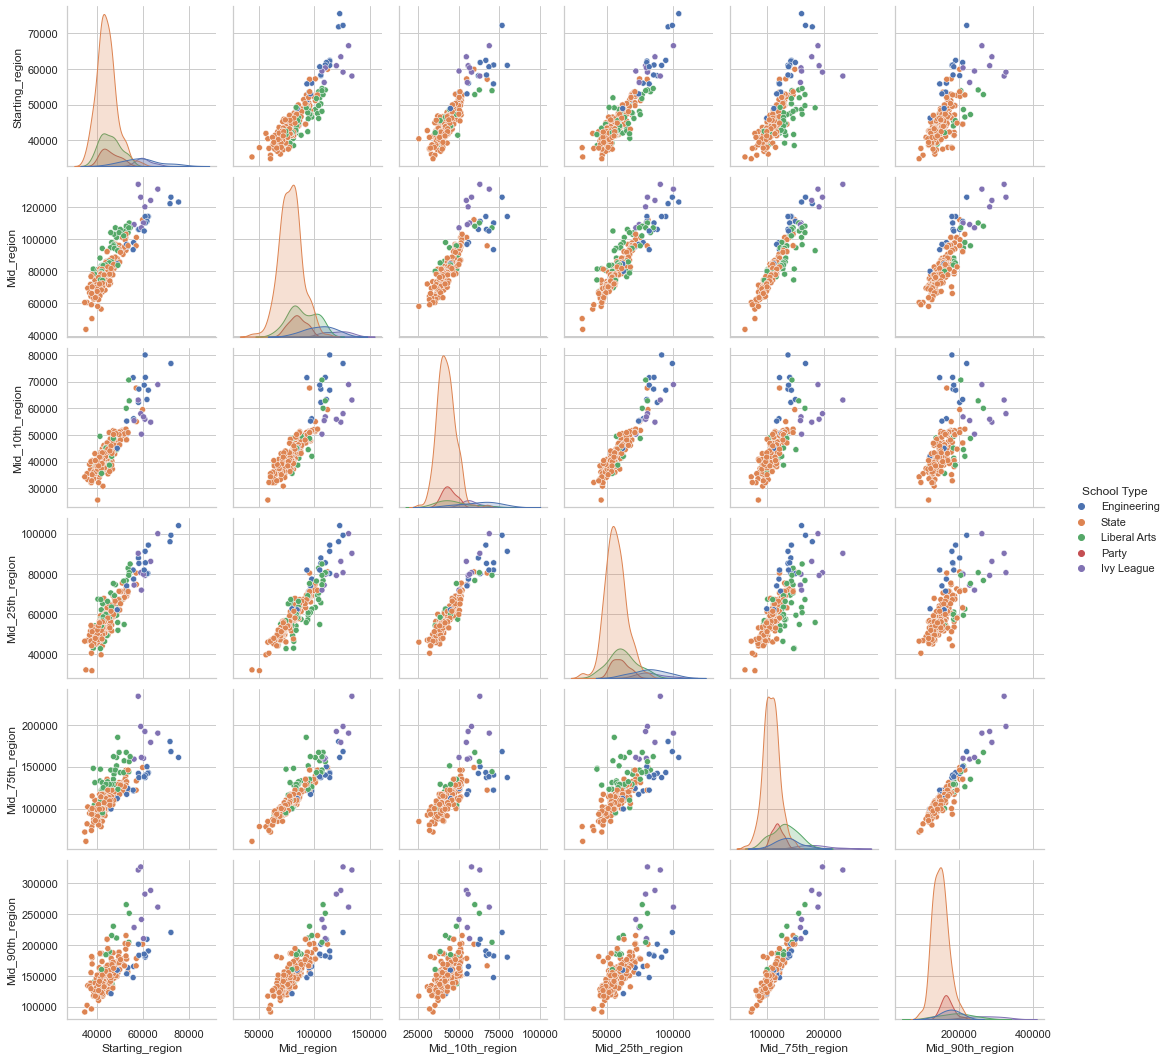

In [164]:
# Added by Fernando 
sns.pairplot(df_type_region, hue="School Type");


0.3125
0.35000000000000003
0.30416666666666664
0.3416666666666666
0.3708333333333333
0.35833333333333334
0.3833333333333333
0.37916666666666665


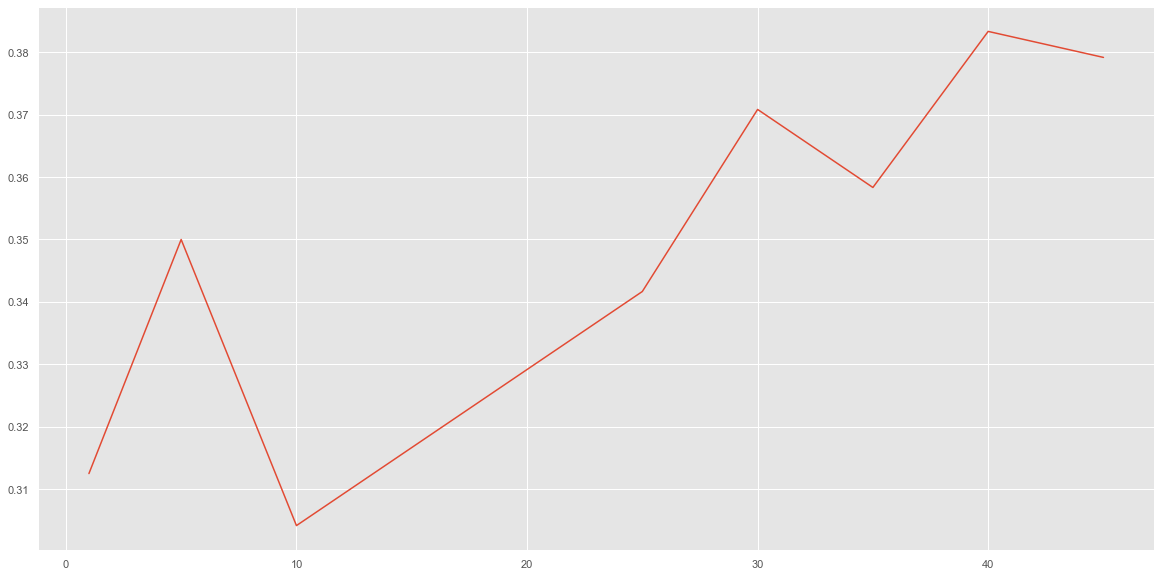

In [188]:
#added by Fernando 

#Integer Encoding 
df_regionEncoding=df_region.replace({'California':0,'Midwestern':1,'Northeastern':2,'Southern':3,'Western':4})

#splitting data into testing and training sets
X_train, X_test, y_train, y_test=train_test_split(df_region[['Starting Median Salary','Mid-Career Median Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary']], df_regionEncoding["Region"], random_state=1, test_size=0.75)

#testing with diffrent K values 
k_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 45])


#k-Nearest Kneighbors method: Testing with diffrent k values 

#Average accuracy for diffrent k values
aveAccuracies = np.zeros(len(k_neighbors))

for i, val in enumerate(k_neighbors):
    model = KNeighborsClassifier(n_neighbors = val)
    model.fit(X_train,y_train)
    scores = cross_val_score(estimator=model,X=X_test,y=y_test,cv=3,scoring='accuracy')
    aveAccuracies[i] = scores.mean()
    print(aveAccuracies[i])
    
plt.plot(k_neighbors,aveAccuracies)    
    
    


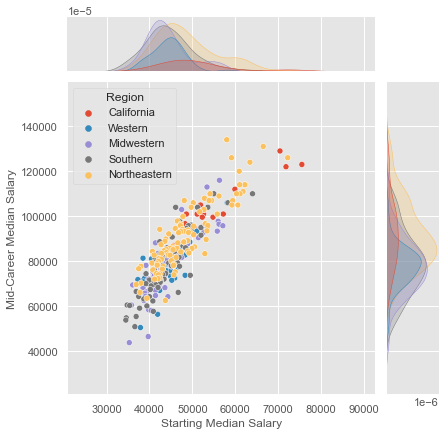

In [186]:
#Added Fernando 
sns.jointplot(data=df_region, x="Starting Median Salary", y="Mid-Career Median Salary", hue="Region")


In [161]:
#added by Fernando 

#Using KNN method on high wage growth. 

diff = df_region["Mid-Career Median Salary"] - df_region["Starting Median Salary"]

median=st.median(diff)

y_bestRank = np.zeros(len(diff))

for i,val in enumerate(diff):
    if val > median:
        y_bestRank[i] = 1
    else:
        y_bestRank[i] = 0

        
#using kNN to predict the best growth in a degree      

df_regionEncoding["Best Growth"] = y_bestRank




X_train, X_test, y_train, y_test=train_test_split(df_regionEncoding[['Starting Median Salary','Region']], df_regionEncoding["Best Growth"], random_state=1, test_size=0.75)


#testing with diffrent K values 
k_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 45])


#k-Nearest Kneighbors method: Testing with diffrent k values 

#Average accuracy for diffrent k values
aveAccuracies = np.zeros(len(k_neighbors))

for i, val in enumerate(k_neighbors):
    model = KNeighborsClassifier(n_neighbors = val)
    model.fit(X_train,y_train)
    scores = cross_val_score(estimator=model,X=X_test,y=y_test,cv=3,scoring='accuracy')
    aveAccuracies[i] = scores.mean()
    print(aveAccuracies[i])
    
plt.plot(k_neighbors,aveAccuracies)    










NameError: name 'df_regionEncoding' is not defined

0.634375
0.678125
0.71875
0.721875
0.725
0.721875
0.728125
0.7375
0.740625


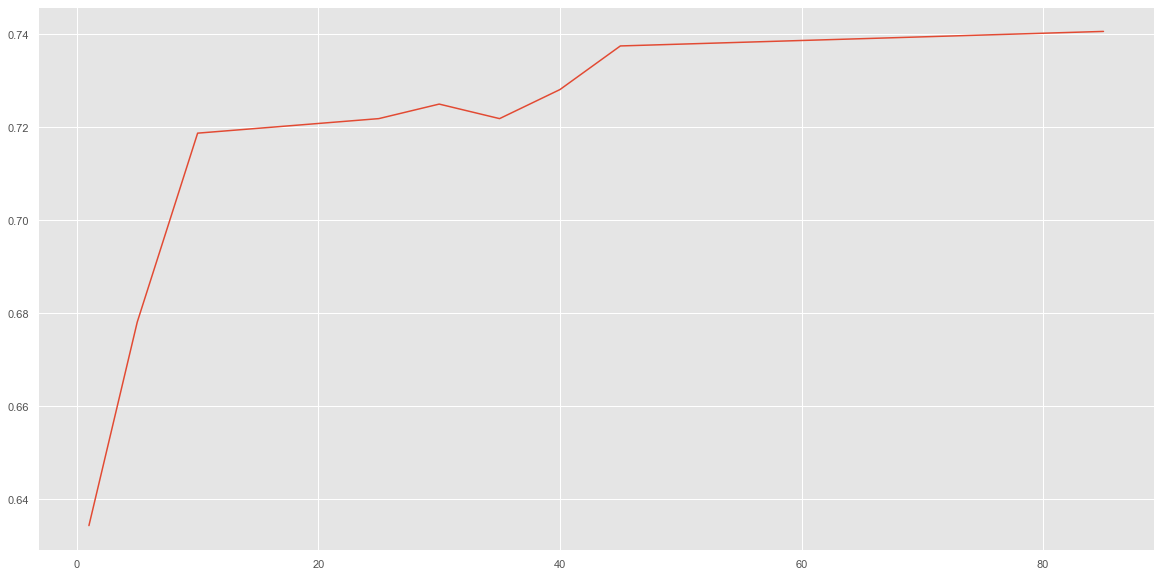

In [238]:
#Added by Fernando Turcios 
#One-Hot encoding 
#df_region_dummies=pd.get_dummies(df_region)

#df_region

#Using KNN method on high wage growth. 

diff = df_region["Mid-Career Median Salary"] - df_region["Starting Median Salary"]

median=st.median(diff)

y_bestRank = np.zeros(len(diff))

for i,val in enumerate(diff):
    if val > median:
        y_bestRank[i] = 1
    else:
        y_bestRank[i] = 0

        
#using kNN to predict the best growth in a degree      

df_regionEncoding["Best Growth"] = y_bestRank
df_regionEncoding["diff"] = diff

#testing with diffrent K values 
k_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 45,85])


X = df_regionEncoding[["Starting Median Salary","Region"]]
y = df_regionEncoding["Best Growth"]

#k-Nearest Kneighbors method: Testing with diffrent k values 

#Average accuracy for diffrent k values
aveAccuracies = np.zeros(len(k_neighbors))

for i, val in enumerate(k_neighbors):
    model = KNeighborsClassifier(n_neighbors = val)
    model.fit(X,y)
    scores = cross_val_score(estimator=model,X=X,y=y,cv=5,scoring='accuracy')
    aveAccuracies[i] = scores.mean()
    print(aveAccuracies[i])
    
plt.plot(k_neighbors,aveAccuracies)    




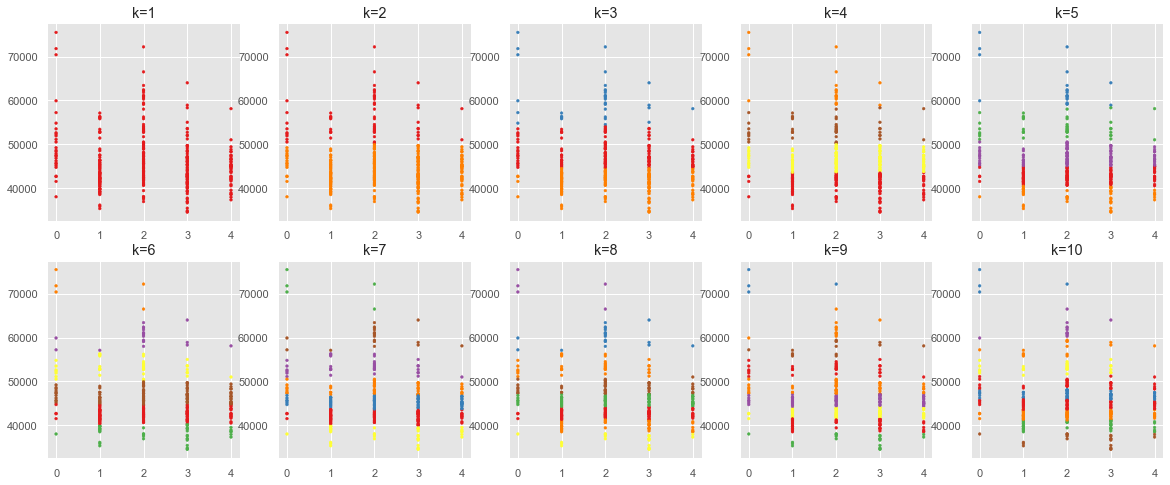

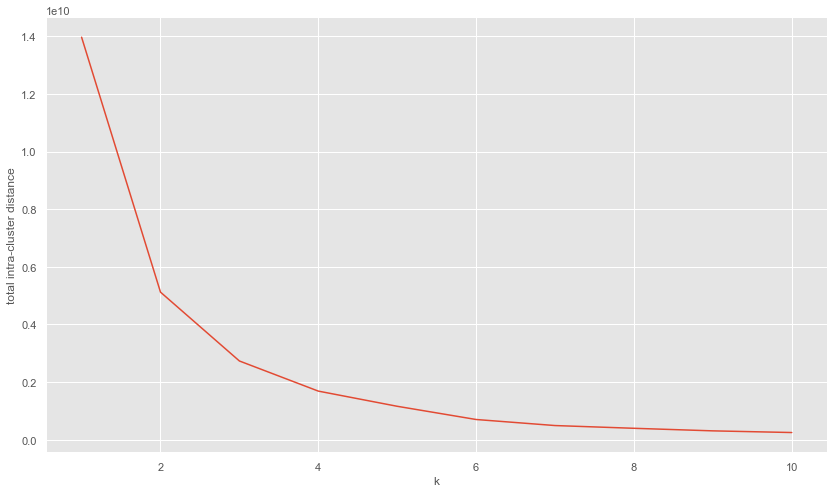

In [249]:
#Kmeans clustering 

X = df_regionEncoding[["Starting Median Salary","Region"]]
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

#y_pred = KMeans(n_clusters=10, n_init=1, init='random', max_iter=1).fit_predict(X)
#plt.scatter(df_regionEncoding["Region"],df_regionEncoding["diff"], c=y_pred, cmap=cmap);

ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(X)
    scores.append(-model.score(X))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(df_regionEncoding["Region"], df_regionEncoding["Starting Median Salary"], c=y_pred,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()




In [255]:
#Added Fernando 

#Found #of clusters 6 to be the best 
model = KMeans(n_clusters=6)
y_pred = model.fit_predict(X)



cluster = pd.DataFrame(y_pred,columns=['cluster'])
school = df_regionEncoding["University"].to_frame()
cluster["University"] = school

group1 = cluster.loc[cluster["cluster"] == 0]
group2 = cluster.loc[cluster["cluster"] == 1]
group3 = cluster.loc[cluster["cluster"] == 2]
group4 = cluster.loc[cluster["cluster"] == 3]
group5 = cluster.loc[cluster["cluster"] == 4]
group6 = cluster.loc[cluster["cluster"] == 5]

Cluster_list = [group1, group2, group3, group4, group5, group6]

for i in range(6):
    group = Cluster_list[i]
    print(f'Group_{i+1}: {group["University"]}')

    

Group_1: 8                                     Pomona College
11            University of California, Irvine (UCI)
14          California State University (CSU), Chico
15     California State University, Fullerton (CSUF)
16             San Francisco State University (SFSU)
                           ...                      
295                          Philadelphia University
299                   Fairleigh Dickinson University
301     University of Massachusetts (UMass) - Boston
307                          Sacred Heart University
310                          Penn State - Harrisburg
Name: University, Length: 103, dtype: object
Group_2: 3                University of California, Berkeley
5                          Cal Poly San Luis Obispo
28                         Colorado School of Mines
77             University of Missouri - Rolla (UMR)
141                                 Rice University
143                                 Duke University
144                 Georgia Institute of T